# Projet Data

Visualization

In [2]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Map

Sélectionner les données nécessaires dans la base de données

In [2]:
df = pd.read_excel("webscraping.xlsx", usecols=["Latitude", "Longitude", "Adults", "Children"])
df.head()

,Adults,Children,Latitude,Longitude
0,20.0,20.0,49.842121,4.972678
1,5.0,3.0,50.549776,5.324099
2,8.0,0.0,50.489398,5.096547
3,8.0,0.0,50.489398,5.096547
4,10.0,6.0,50.341611,4.838456


Combinez le diagramme de dispersion avec les Geopandas

In [3]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Adults,Children,Latitude,Longitude,geometry
0,20.0,20.0,49.842121,4.972678,POINT (4.97268 49.84212)
1,5.0,3.0,50.549776,5.324099,POINT (5.32410 50.54978)
2,8.0,0.0,50.489398,5.096547,POINT (5.09655 50.48940)
3,8.0,0.0,50.489398,5.096547,POINT (5.09655 50.48940)
4,10.0,6.0,50.341611,4.838456,POINT (4.83846 50.34161)


Combiner les infos avec la carte

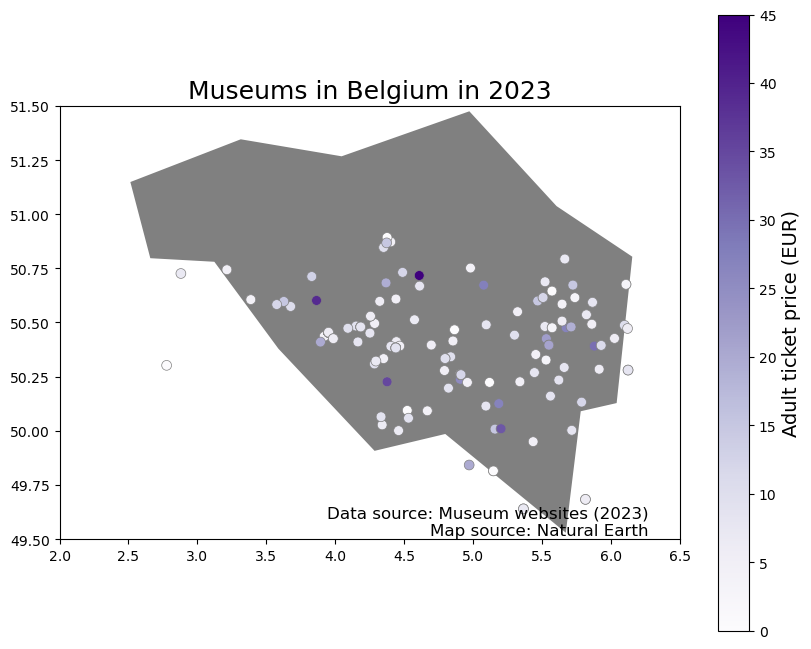

In [4]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Purples"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Adults"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Adult ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

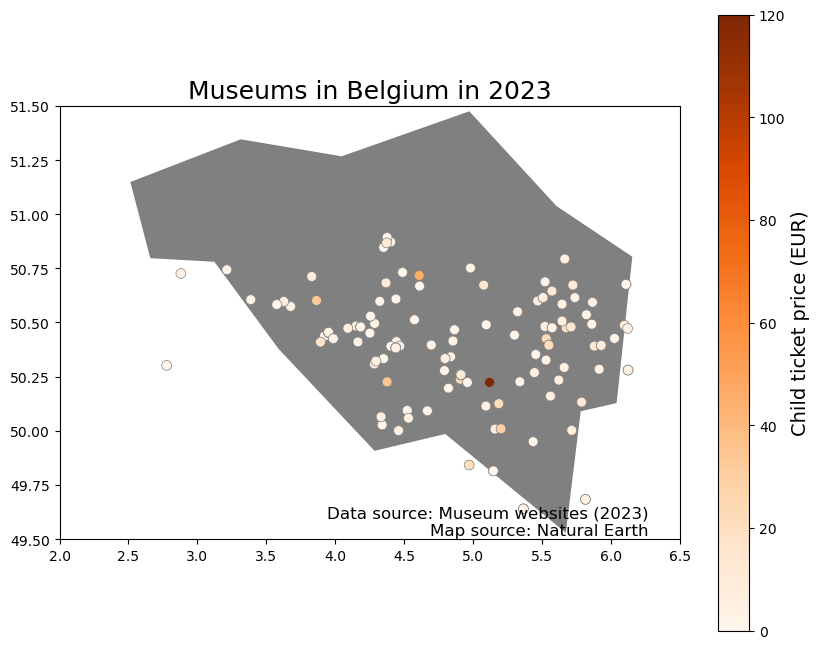

In [5]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Oranges"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Children"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Child ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

In [ ]:
pip install folium

In [6]:
import folium

# Create a map of Belgium
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

# Show the map
belgium_map

In [7]:
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

for lat, lon in zip(belgium_df['Latitude'], belgium_df['Longitude']):
    folium.Marker(location=[lat, lon]).add_to(belgium_map)

belgium_map

In [8]:
from folium.plugins import HeatMap
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

data = belgium_df[['Latitude', 'Longitude']].values.tolist()
heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})
heatmap_layer.add_to(belgium_map)

belgium_map

C:\Users\flori\AppData\Local\Temp\ipykernel_15716\4008482117.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})


## Scatter plot

See if there is a relation between the visiting time and the adult price

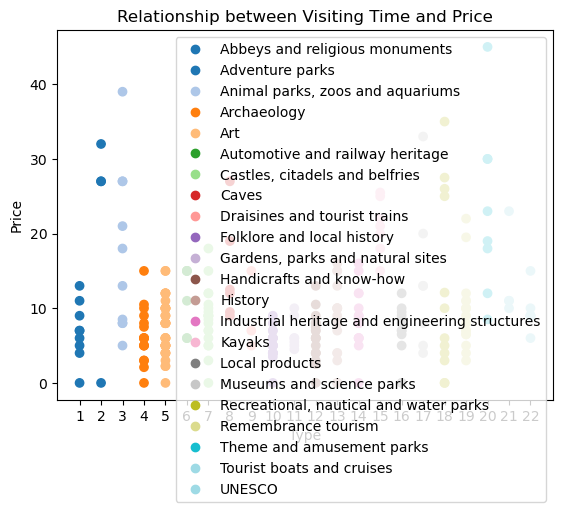

In [7]:
df = pd.read_excel('webscraping.xlsx')
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}
df['Type'] = df['Type'].replace(activity_type_dict)
num_colors = len(activity_type_dict)
colors = plt.cm.get_cmap('tab20', num_colors)
legend_entries = []
for activity, color in zip(activity_type_dict.keys(), colors.colors):
    legend_entries.append(plt.Line2D([], [], marker='o', linestyle='', color=color, label=activity))
plt.scatter(df['Type'], df['Adults'], c=colors(df['Type'] - 1))

# Add axis labels and title
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Relationship between Visiting Time and Price')
plt.legend(handles=legend_entries)
xtick_labels = range(1, len(activity_type_dict) + 1)
plt.xticks(list(activity_type_dict.values()), xtick_labels)
# Show the plot
plt.show()

## Bar Chart

See how many activities there are for the 20 cities with the most activities

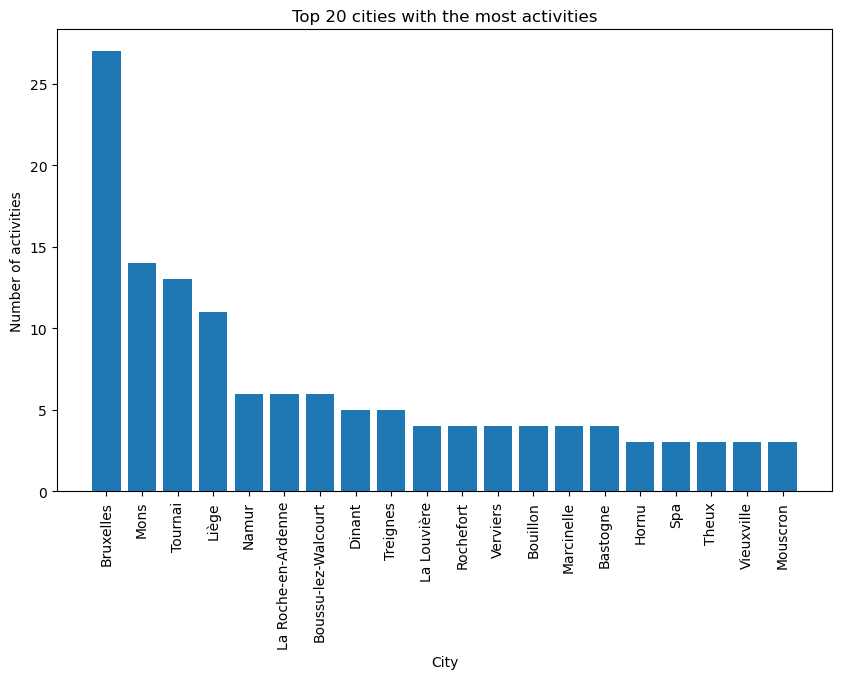

In [13]:
top_cities = df.groupby('City').size().sort_values(ascending=False).head(20)

# Create a bar chart of the top 10 cities and their activity count
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of activities')
plt.title('Top 20 cities with the most activities')
plt.show()

## Box plot

show the distribution of adult prices for each activity type

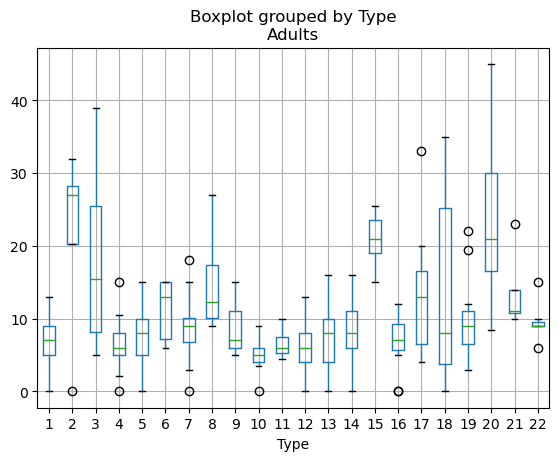

In [15]:
df = df.dropna()

# Create Series objects for array1 and array2
array1 = df['Adults']
array2 = df['Children']

# Calculate the result
result = array1 / array2

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

# Replace the activity types with the corresponding numeric values
df['Type'] = df['Type'].replace(activity_type_dict)

# Create a box plot of prices by activity type
ax = df.boxplot(column='Adults', by='Type')

# Replace the activity type labels on the x-axis
labels = {'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22}
ax.set_xticklabels(labels.values())

plt.show()

The box plot shows the median price (the line inside the box), the interquartile range (the box), the whiskers (the lines extending from the box that indicate the range of values outside the box), and any outliers (represented as individual points).

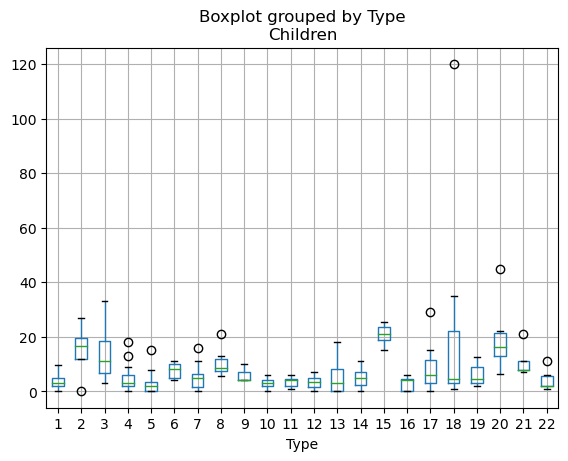

In [16]:
array1 = df['Adults']
array2 = df['Children']

# Calculate the result
result = array1 / array2

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

# Replace the activity types with the corresponding numeric values
df['Type'] = df['Type'].replace(activity_type_dict)

# Create a box plot of prices by activity type
ax = df.boxplot(column='Children', by='Type')

# Replace the activity type labels on the x-axis
labels = {'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22}
ax.set_xticklabels(labels.values())

plt.show()

## Pie chart

show the percentage of each activity type in the database.

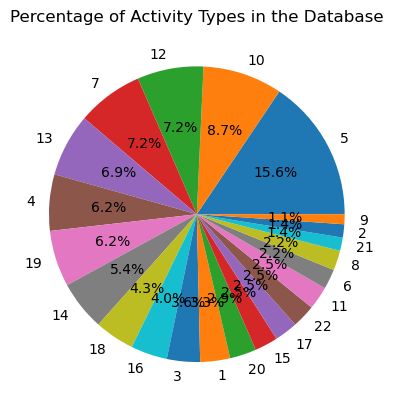

In [17]:
activity_counts = dict(df['Type'].value_counts())

# Create a list of activity types and their counts
activity_types = list(activity_counts.keys())
activity_values = list(activity_counts.values())

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(activity_values, labels=activity_types, autopct='%1.1f%%')

# Set the title of the chart
ax.set_title('Percentage of Activity Types in the Database')

# Show the chart
plt.show()

## Heatmap

show the density of activities in different regions of Belgium

<AxesSubplot:ylabel='City'>

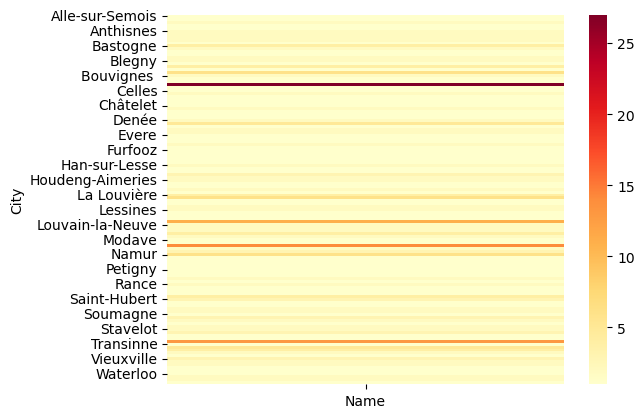

In [19]:
import seaborn as sns

region_counts = df.groupby('City')['Name'].count()

# Create a pivot table with the counts of activities by region
pivot_table = pd.pivot_table(df, values='Name', index='City', aggfunc='count')

# Plot the pivot table as a heatmap
sns.heatmap(pivot_table, cmap='YlOrRd')